In [4]:
import matplotlib.pyplot as plt
from PIL import Image
from skimage.feature import hog

from sneakers_ml.features.hog import HogFeatures

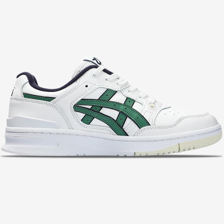

In [5]:
image = "data/merged/images/by-brands/asics/0.jpeg"
hog_features = HogFeatures({}, {})
img = Image.open("data/merged/images/by-brands/asics/0.jpeg")
img = hog_features.apply_transforms(img)
img

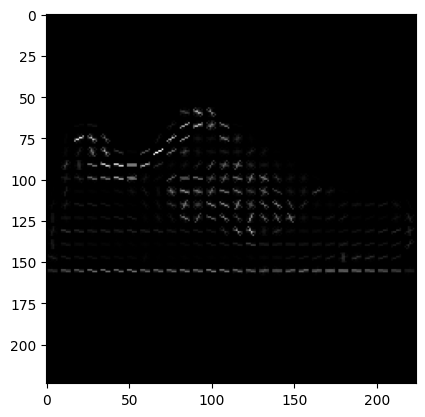

In [6]:
fd, hog_image = hog(
    img, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True, channel_axis=-1
)
plt.imshow(hog_image, cmap=plt.cm.gray)

In [7]:
fd.shape

(6272,)